# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy.core as owm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#establish url 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
#establish settings
settings = {"units": "Imperial", "appid": weather_api_key}
metrics = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']

In [22]:

#create lists to store data
city_name = []
city_record = []
clouds = []
date = []
country = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

#make calls
call = 1

print(f'Beginning Data Retrival')
print('-------------------------')

for city in cities:
    try:
        response = url + '&q=' + city.replace(' ','+')
        city_data = owm.get_current(city, **settings)
        cd, dt, ct, hum, mt, ws, lt, lng = city_data(*metrics)
        clouds.append(cd)
        date.append(dt)
        country.append(ct)
        humidity.append(hum)
        max_temp.append(mt)
        wind_speed.append(ws)
        lat.append(lt)
        long.append(lng)
        city_name.append(city)
        print(f"Processing Record| {call} {city}")
        print(response)
        call = call + 1
        time.sleep(1.00)
    except:
        print("City not found. Skipping...")
        time.sleep(1.00)
    continue

Beginning Data Retrival
-------------------------
City not found. Skipping...
Processing Record| 1 ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=ushuaia
City not found. Skipping...
Processing Record| 2 at-bashi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=at-bashi
Processing Record| 3 dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=dikson
Processing Record| 4 rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=rikitea
City not found. Skipping...
Processing Record| 5 tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=tazovskiy
Processing Record| 6 moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=moron
Processing Record| 7 hitha

City not found. Skipping...
City not found. Skipping...
Processing Record| 56 concarneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=concarneau
Processing Record| 57 yaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=yaan
Processing Record| 58 erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=erenhot
Processing Record| 59 skjeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=skjeberg
City not found. Skipping...
Processing Record| 60 kaabong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=kaabong
City not found. Skipping...
City not found. Skipping...
Processing Record| 61 bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=bredasdorp
Proces

Processing Record| 110 georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=georgetown
Processing Record| 111 mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=mezen
City not found. Skipping...
City not found. Skipping...
Processing Record| 112 suzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=suzhou
Processing Record| 113 tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=tuatapere
City not found. Skipping...
City not found. Skipping...
Processing Record| 114 pudozh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=pudozh
Processing Record| 115 leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=leningradskiy
City not found. Skippi

City not found. Skipping...
Processing Record| 165 pundaguitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=pundaguitan
Processing Record| 166 sovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=sovetskiy
City not found. Skipping...
Processing Record| 167 hays
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=hays
Processing Record| 168 beidao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=beidao
Processing Record| 169 ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=ostrovnoy
Processing Record| 170 sompeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=sompeta
Processing Record| 171 ahipara
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record| 219 beaverlodge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=beaverlodge
Processing Record| 220 komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=komsomolskiy
Processing Record| 221 opotiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=opotiki
Processing Record| 222 changping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=changping
Processing Record| 223 chegdomyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=chegdomyn
Processing Record| 224 luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=luau
Processing Record| 225 banjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d9

City not found. Skipping...
Processing Record| 274 verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=verkhnevilyuysk
City not found. Skipping...
Processing Record| 275 turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=turukhansk
Processing Record| 276 lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=lata
Processing Record| 277 sumenep
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=sumenep
City not found. Skipping...
Processing Record| 278 kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=kapit
City not found. Skipping...
Processing Record| 279 pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=pangnirtung
Processing Recor

Processing Record| 329 tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=tiarei
Processing Record| 330 bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=bandarbeyla
Processing Record| 331 ust-maya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=ust-maya
Processing Record| 332 tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=tilichiki
Processing Record| 333 nehe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=nehe
Processing Record| 334 narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=narasannapeta
Processing Record| 335 kaduy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&

Processing Record| 383 frontera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=frontera
City not found. Skipping...
Processing Record| 384 bulancak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=bulancak
Processing Record| 385 pedasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=pedasi
City not found. Skipping...
Processing Record| 386 cardston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=cardston
Processing Record| 387 rovira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=rovira
Processing Record| 388 nikolsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=nikolsk
City not found. Skipping...
Processing Record| 389 yarmouth
http://api.openweathermap.org/

Processing Record| 438 gurun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=gurun
City not found. Skipping...
Processing Record| 439 raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=raudeberg
Processing Record| 440 kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=kurilsk
Processing Record| 441 yuanping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=yuanping
City not found. Skipping...
Processing Record| 442 ende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=ende
City not found. Skipping...
Processing Record| 443 inirida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cdc2edc7bee4df7145a3cf07441d94b&q=inirida
Processing Record| 444 resistencia
http://api.openweathermap.org/dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_dict = pd.DataFrame({"City": city_name,"Cloudiness": clouds, "Country": date, "Date": country, 
                "Humidity": humidity, "Lat": lat, "Lng": long, "Max Temp": max_temp, "Wind Speed": wind_speed})
weather_dict
#weather_dict.to_csv('output_data.csv')

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1580592886,71,-54.80,-68.30,53.60,28.86
1,at-bashi,42,KG,1580592889,46,41.17,75.81,-1.52,10.71
2,dikson,51,RU,1580592890,97,73.51,80.55,-14.55,12.93
3,rikitea,100,PF,1580592891,78,-23.12,-134.97,79.65,12.75
4,tazovskiy,65,RU,1580592893,96,67.47,78.70,-18.85,13.69
...,...,...,...,...,...,...,...,...,...
455,batagay,71,RU,1580593590,95,67.63,134.63,-24.03,1.74
456,teguldet,95,RU,1580593591,98,57.31,88.17,-3.28,3.96
457,salinopolis,68,BR,1580593592,78,-0.61,-47.36,81.27,15.77
458,strizhi,99,RU,1580593593,96,58.46,49.29,15.64,4.76


In [24]:
weather_dict["Lng"].max()

179.32

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

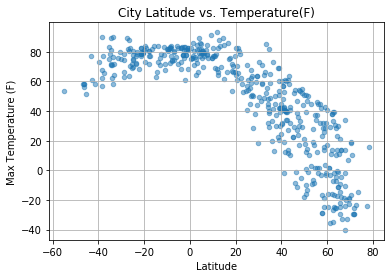

In [26]:
fig, ax = plt.subplots()
weather_dict.plot(kind='scatter', x='Lat', y='Max Temp', ax=ax, alpha = 0.5)
plt.title("City Latitude vs. Temperature(F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvtemp.png")

#### Latitude vs. Humidity Plot

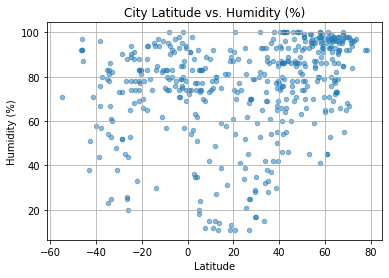

In [27]:
fig, ax = plt.subplots()
weather_dict.plot(kind='scatter', x='Lat', y='Humidity', ax=ax, alpha = 0.5)
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvhum.png")

#### Latitude vs. Cloudiness Plot

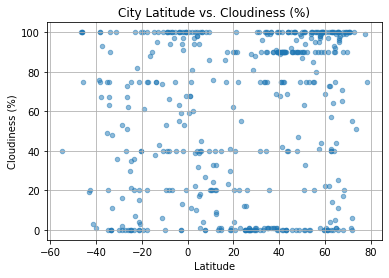

In [28]:
fig, ax = plt.subplots()
weather_dict.plot(kind='scatter', x='Lat', y='Cloudiness', ax=ax, alpha = 0.5)
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvcloud.png")

#### Latitude vs. Wind Speed Plot

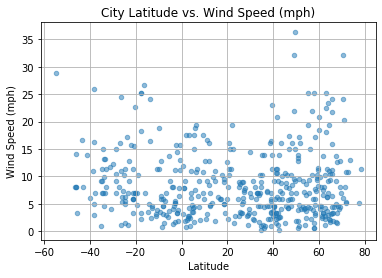

In [29]:
fig, ax = plt.subplots()
weather_dict.plot(kind='scatter', x='Lat', y='Wind Speed', ax=ax, alpha = 0.5)
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvws.png")

## Linear Regression

In [30]:
# Create Northern and Southern Hemisphere DataFrames
nh_group = weather_dict.loc[weather_dict["Lat"]>= 0]
sh_group = weather_dict.loc[weather_dict["Lat"]< 0]
nh_group.dtypes


City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8474892424864805


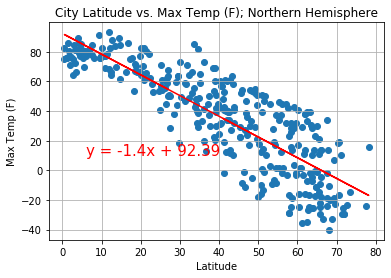

In [31]:
fig, ax = plt.subplots()
y_values = nh_group["Max Temp"]
x_values = nh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Max Temp (F); Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvtemp_nh.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4677963946348375


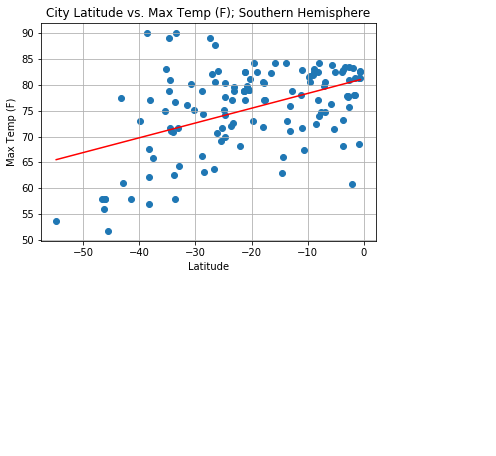

In [41]:
fig, ax = plt.subplots()
y_values = sh_group["Max Temp"]
x_values = sh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Max Temp (F); Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvtemp_sh.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4414224116715802


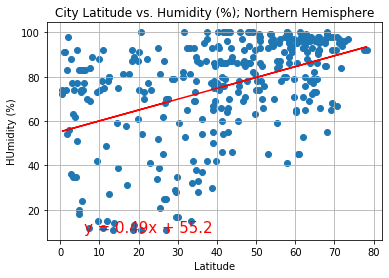

In [33]:
fig, ax = plt.subplots()
y_values = nh_group["Humidity"]
x_values = nh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Humidity (%); Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("HUmidity (%)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvhum_nh.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30553911346950896


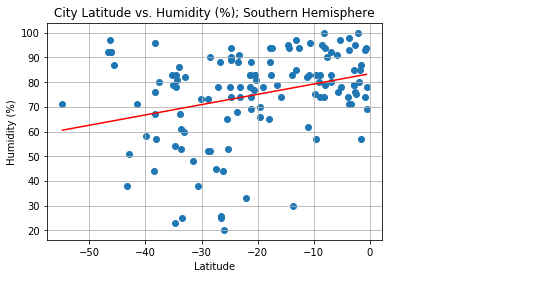

In [52]:
fig, ax = plt.subplots()
y_values = sh_group["Humidity"]
x_values = sh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Humidity (%); Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,2),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvhum_sh.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.22888620227084633


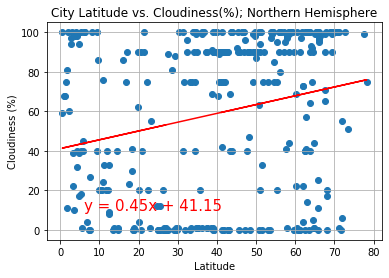

In [35]:
fig, ax = plt.subplots()
y_values = nh_group["Cloudiness"]
x_values = nh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Cloudiness(%); Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvcloud_nh.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17989904468896722


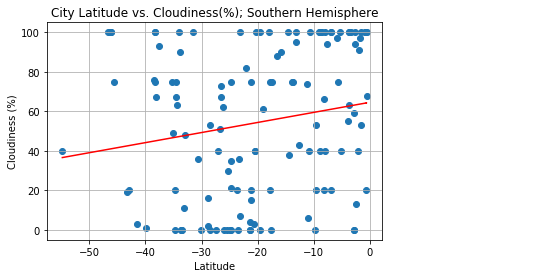

In [36]:
fig, ax = plt.subplots()
y_values = sh_group["Cloudiness"]
x_values = sh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Cloudiness(%); Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvcloud_sh.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10391944313506356


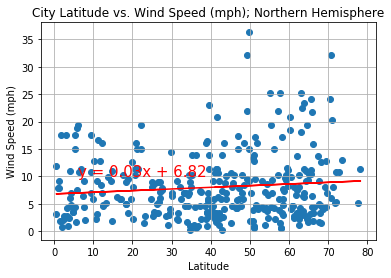

In [37]:
fig, ax = plt.subplots()
y_values = nh_group["Wind Speed"]
x_values = nh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Wind Speed (mph); Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvws_nh.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2290687214403037


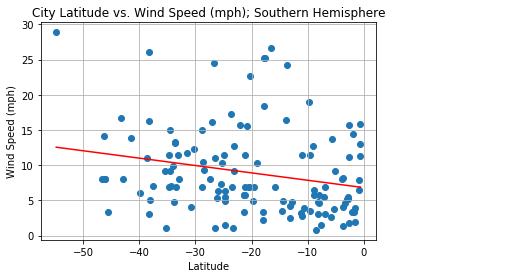

In [38]:
fig, ax = plt.subplots()
y_values = sh_group["Wind Speed"]
x_values = sh_group["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
plt.title("City Latitude vs. Wind Speed (mph); Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
# Turn on the grid
ax.grid()
plt.savefig("../Images/latvws_sh.png")

Observations: 
- Latitude vs. Max Temp in the Northern Hemisphere are negatively correlated with a r value of -0.84. This makes sense, as the most northern countries are some of the coldest, such as Canada and Iceland. 
- None of the other parameters have a strong correlation when compared to latitude. I thought that Humidity and Latitude would be negatively correlated because northern countries are drier more often than countries near the equator. However, data may have been pulled from the summer months where these countries are more humid. 
- I had one city in my dataset that was much further south than the any of the other countries, my guess is that it is either a city in New Zealand or Chile. I think that my southern hemisphere data might show stronger correlations if I were to remove this data point. 